- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:  
    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

### STEPS
1. Reading, understanding
2. Visualizing the model
3. Preparing the Data
4. Preparing the model for train and test and rescalling
5. Training the model
6. Residual Analysis
7. Prediction and evaluations on the test 

## STEP 1
- Reading and understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### DATA PREPARATION

In [6]:
# renaming few columns for better readibility
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace=True)

In [7]:
# dropping some unnecessary columns
df.drop(['instant','casual','registered'],axis=1,inplace=True)

In [8]:
# Mapping the season/month/weekday/Weather column
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

df.weekday = df.weekday.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

df.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,01-01-2018,spring,0,jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,Tues,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# Some inconsistency in the dteday column with weekend and working column as the date doesn't match so removing the dteday column
df.drop('dteday',axis=1,inplace=True)

In [10]:
df.dtypes

season         object
year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
humidity      float64
windspeed     float64
count           int64
dtype: object

## STEP 2
- Visualizing the data

<Figure size 2000x600 with 0 Axes>

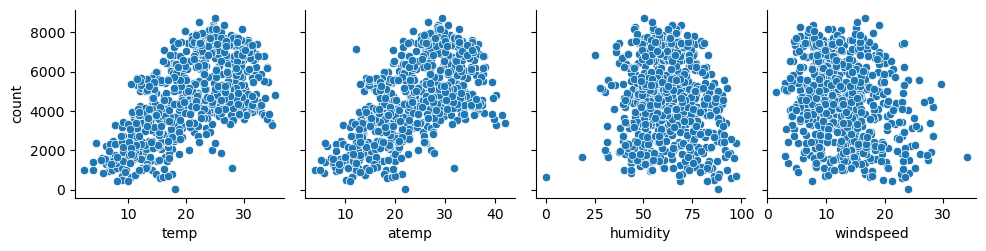

In [11]:
# analysing categorical variable
plt.figure(figsize=(20,6))
sns.pairplot(data=df,y_vars='count',x_vars=['temp', 'atemp', 'humidity', 'windspeed'])

<Axes: >

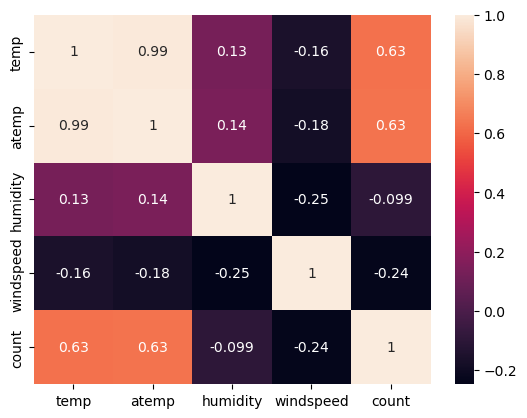

In [12]:
# correlation b/w numberical variables
sns.heatmap(df[['temp','atemp','humidity','windspeed','count']].corr(), annot = True)

- The linear relation b/w the temp and atemp are similar so cannot be used in model building due to multicolinearity, we'll drop them based on p-values and VIF.

# Visualizing the categorical variables

- Univariate Analysis

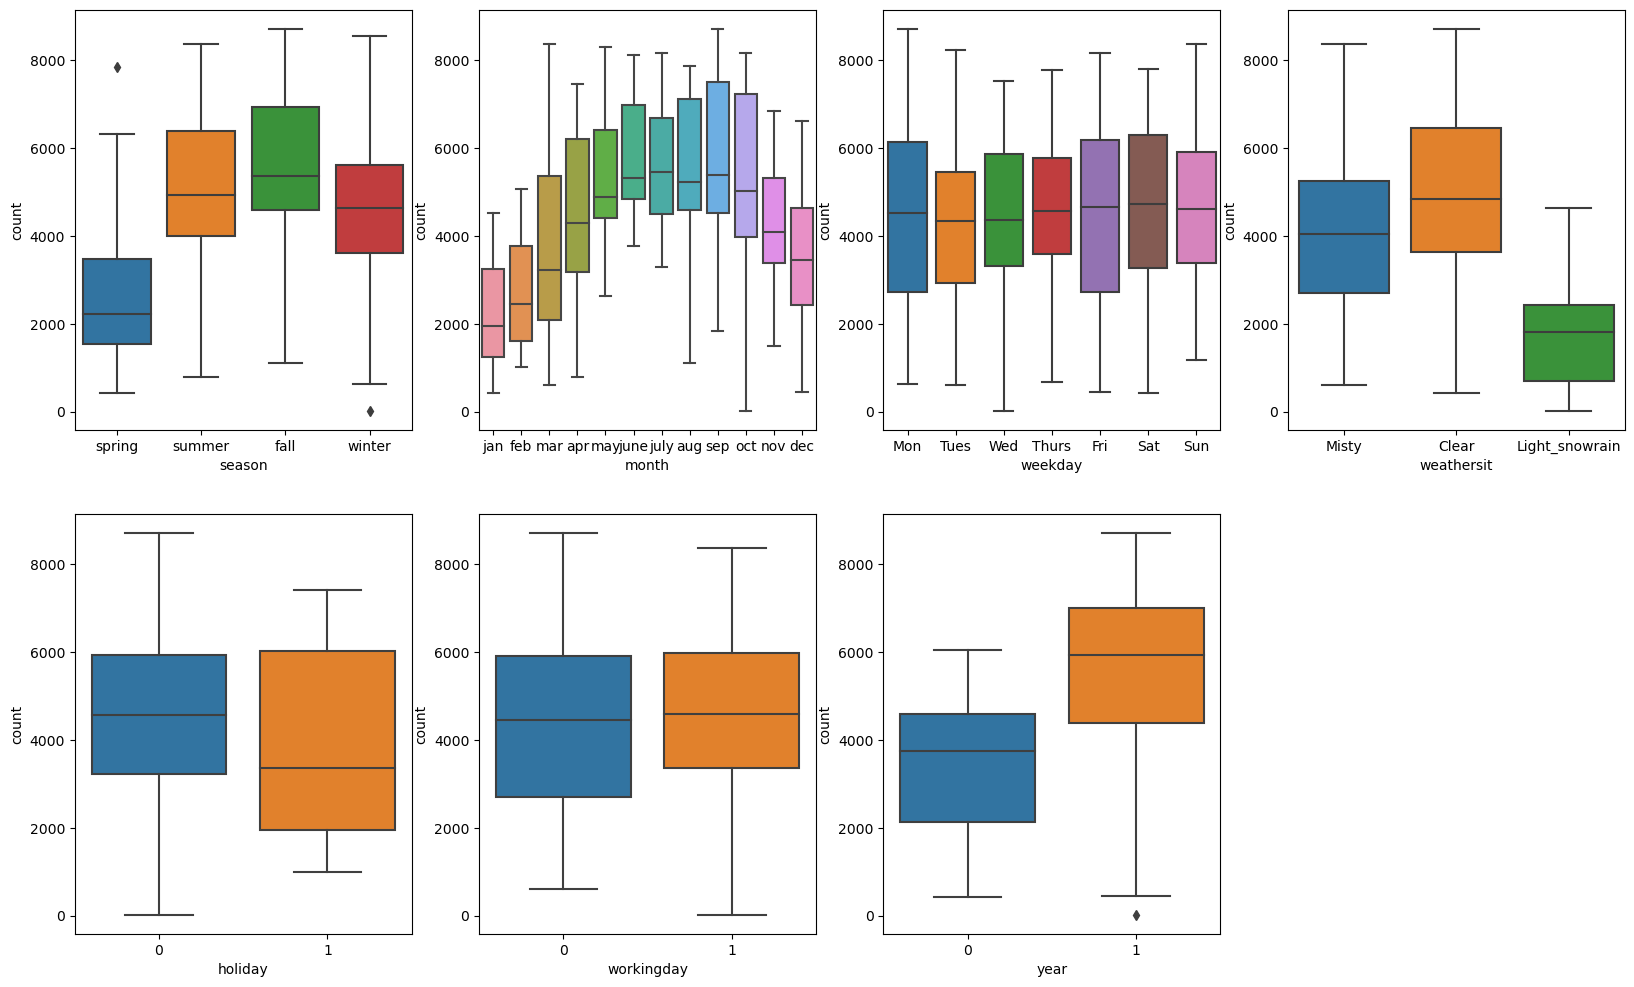

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'count', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'count', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'count', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'count',data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'count', data = df)
plt.show()

- Bivariate Analysis

In [14]:
def bivariate_analysis(columns):
    sns.barplot(x=columns,y='count',data=df, hue='year')
    plt.show()

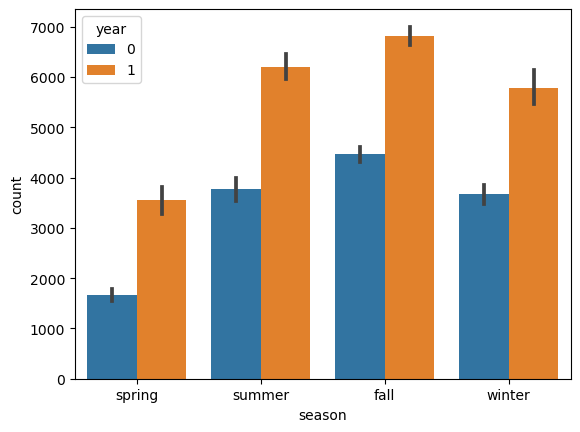

In [15]:
bivariate_analysis('season')

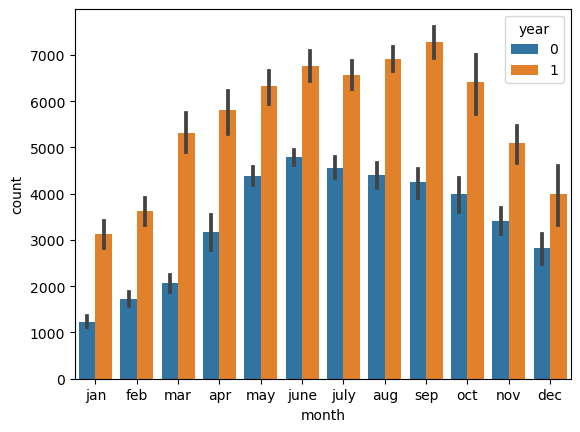

In [16]:
bivariate_analysis('month')

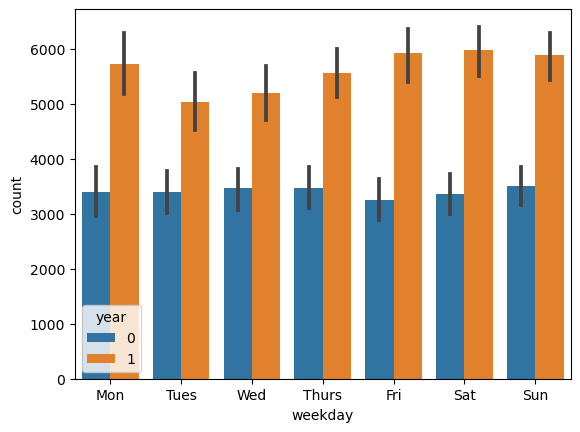

In [17]:
bivariate_analysis('weekday')

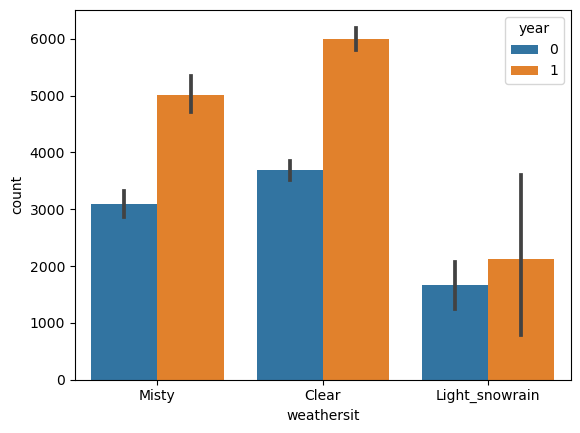

In [18]:
bivariate_analysis('weathersit')

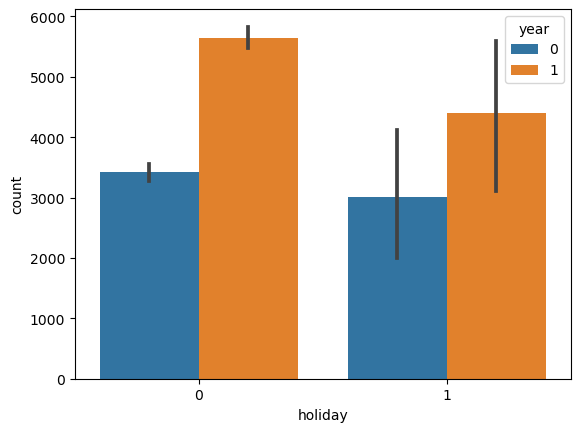

In [19]:
bivariate_analysis('holiday')

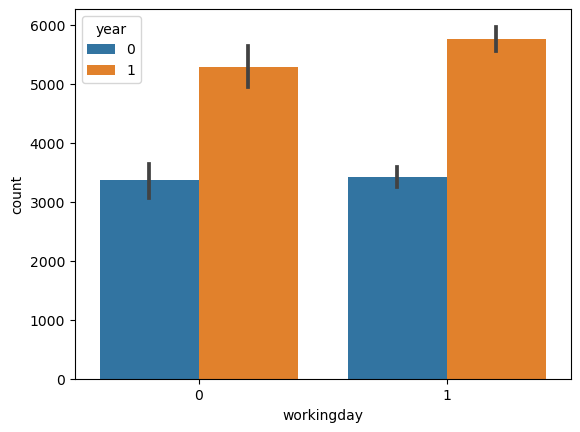

In [20]:
bivariate_analysis('workingday')

- This specifies that 2019 has more sales than 2018

## STEP 3
- Data Preparations

In [21]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True).astype(int)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True).astype(int)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True).astype(int)
seasons_df=pd.get_dummies(df.season,drop_first=True).astype(int)

In [22]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [23]:
df_new.drop(['season','weekday','weathersit','month'],axis=1,inplace=True)

In [24]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,Sat,Sun,Thurs,Tues,Wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


<Axes: >

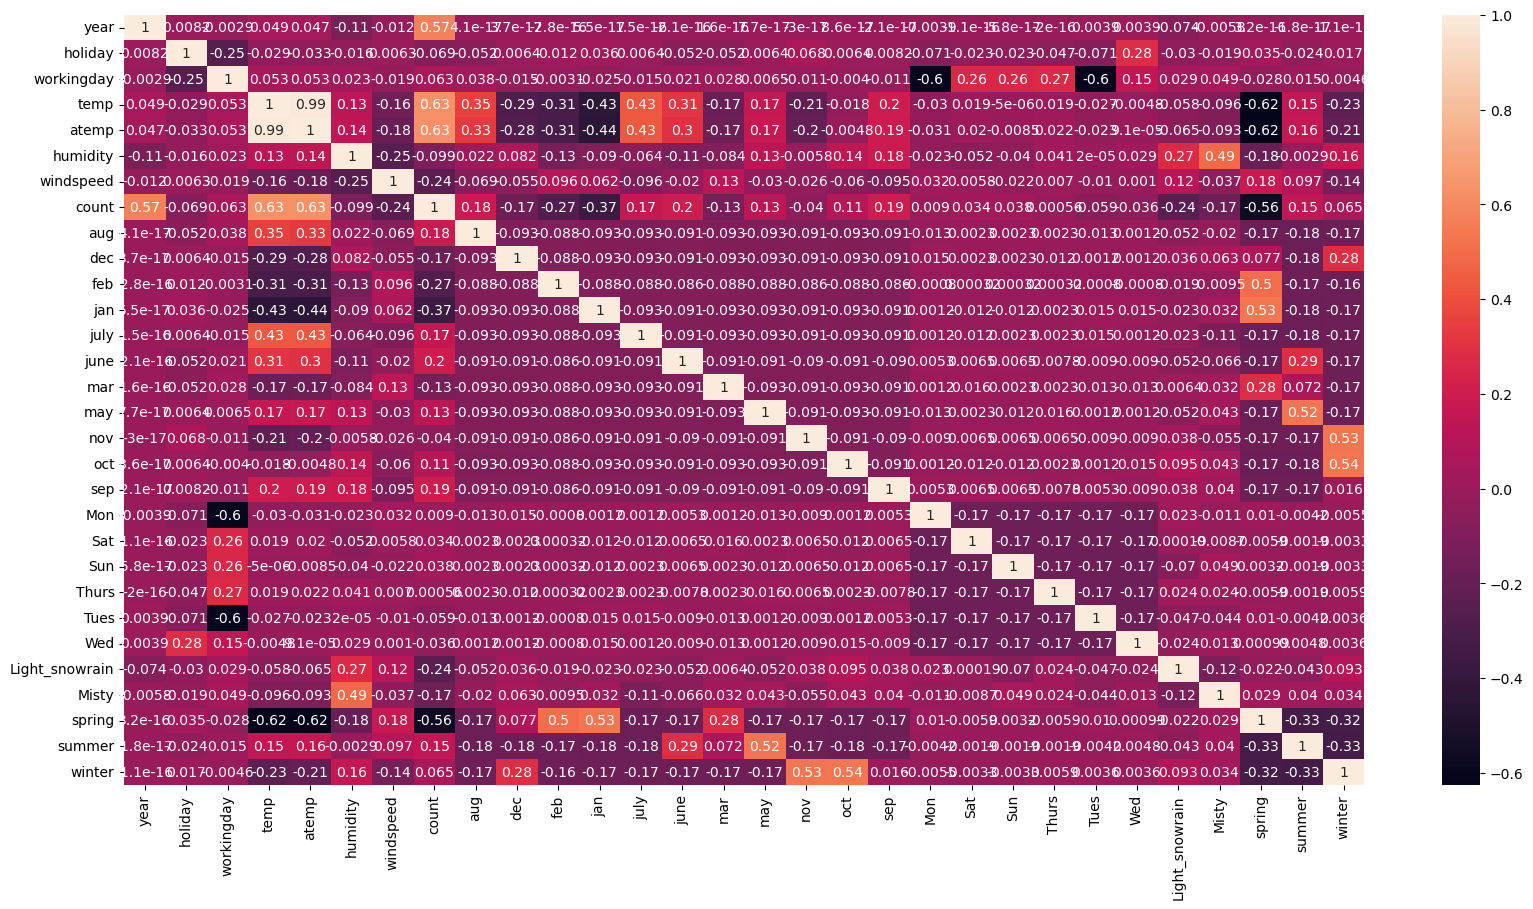

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),annot=True)

## STEP 4
- Preparing the model for train and test and rescalling

In [26]:
df_train, df_test = train_test_split(df_new,train_size=0.7,test_size=0.3,random_state=100)
print(df_test.shape)
print(df_train.shape)

(219, 30)
(510, 30)


In [27]:
pd.set_option('display.max_columns', None)
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [28]:
scaler = MinMaxScaler()
variables = ['count','temp','atemp','humidity','windspeed']

df_train[variables] = scaler.fit_transform(df_train[variables])

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [29]:
y_train = df_train.pop('count')
X_train = df_train

In [30]:
print(X_train.shape)
print(y_train.shape)

(510, 29)
(510,)


In [45]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=10)
rfe = rfe.fit(X_train,y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 12),
 ('dec', False, 8),
 ('feb', False, 9),
 ('jan', False, 6),
 ('july', True, 1),
 ('june', False, 19),
 ('mar', False, 20),
 ('may', False, 11),
 ('nov', False, 7),
 ('oct', False, 17),
 ('sep', True, 1),
 ('Mon', False, 4),
 ('Sat', False, 18),
 ('Sun', False, 16),
 ('Thurs', False, 15),
 ('Tues', False, 13),
 ('Wed', False, 14),
 ('Light_snowrain', True, 1),
 ('Misty', False, 2),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1)]

In [47]:
# columns accepted
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'july', 'sep',
       'Light_snowrain', 'spring', 'winter'],
      dtype='object')

In [48]:
# columns rejected
rejected = X_train.columns[~rfe.support_]
rejected

Index(['workingday', 'atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may',
       'nov', 'oct', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'Misty',
       'summer'],
      dtype='object')

## STEP 5
- Model Training

In [49]:
X_train_rfe = X_train[col]

In [50]:
# Model 1

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.53e-184
Time:                        21:40:42   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3769      0.031     12.

In [51]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [52]:
calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,15.18
2,temp,13.09
4,windspeed,4.02
8,spring,2.40
0,year,2.06
9,winter,1.98
5,july,1.40
6,sep,1.20
7,Light_snowrain,1.11
1,holiday,1.04


In [53]:
# Removing humidity as the VIF is high
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

In [54]:
# Model 2

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          5.33e-171
Time:                        21:41:13   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2042      0.025      8.

In [55]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,year,2.06
7,spring,1.61
8,winter,1.37
4,july,1.34
5,sep,1.20
6,Light_snowrain,1.06
1,holiday,1.04


### We can now conclude that the above model 2 have very low multicolinearity between the predictors.

## STEP 6
- Residual Analysis

In [56]:
y_train_pred = lr_2.predict(X_train_lm_2)

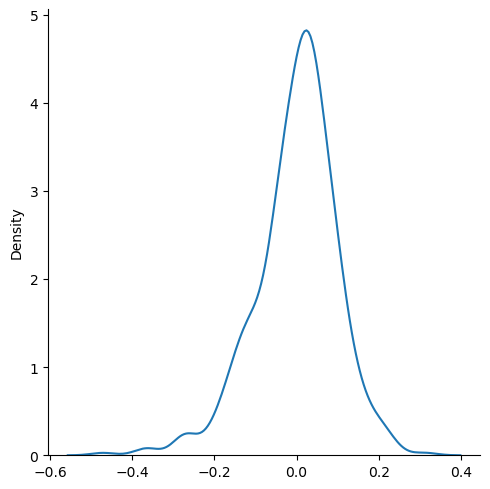

In [61]:
res = y_train-y_train_pred
sns.displot(res,kind='kde')

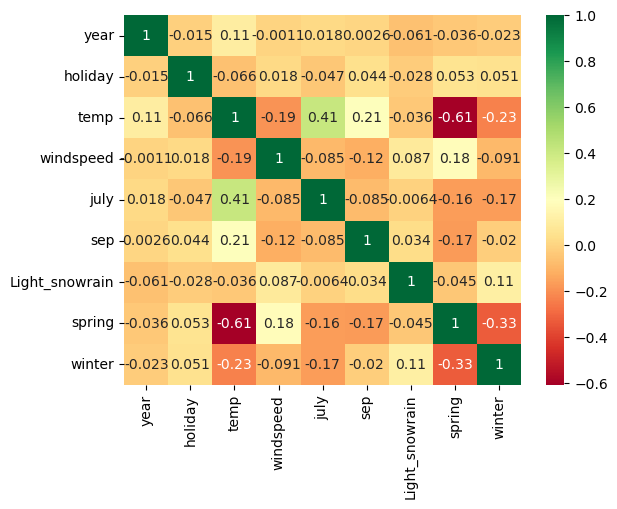

In [62]:
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

## STEP 7
- Prediction and evaluation on the test set

In [64]:
variables = ['count','temp','atemp','humidity','windspeed']

df_test[variables] = scaler.transform(df_test[variables])

df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [65]:
y_test = df_test.pop('count')
X_test = df_test

In [66]:
cols = X_train_new.columns
X_test_new = X_test[cols]

X_test_new = sm.add_constant(X_test_new)

In [68]:
y_test_pred = lr_2.predict(X_test_new)

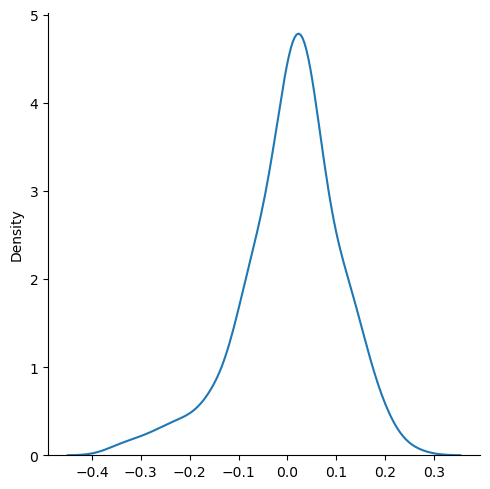

In [69]:
# Check for the distribution
res = y_test - y_test_pred
sns.displot(res,kind='kde')

Text(0, 0.5, 'y_test_pred')

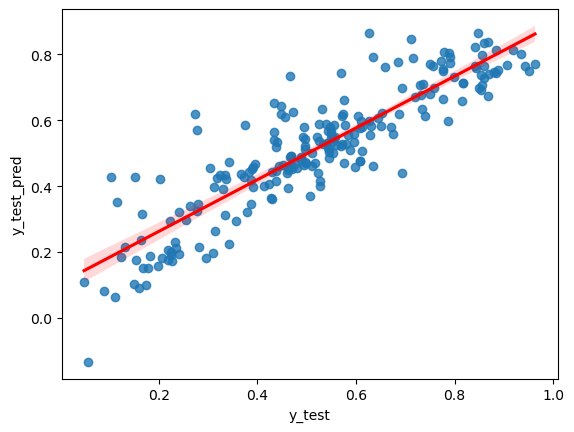

In [70]:
sns.regplot(x=y_test,y=y_test_pred,line_kws={"color": "red"})
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [71]:
r2 = r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7888115946045292

In [72]:
round(lr_2.params,4)

const             0.2042
year              0.2350
holiday          -0.0862
temp              0.4758
windspeed        -0.1325
july             -0.0616
sep               0.0498
Light_snowrain   -0.2562
spring           -0.1032
winter            0.0504
dtype: float64

### SO THE FINAL EQUATION WILL BE 
- count = 0.2042 + year * 0.2350 - holiday * 0.0862 + temp * 0.4758 - windspeed * 0.1325 - july * 0.0616 + sep * 0.0498 - Light_snowrain * 0.2562 - spring * 0.1032 + winter *    0.0504

In [73]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7564


- Train R2 = 0.81
- Test R2 = 0.79

    -  Test is slightly lower than the training R-squared, but not by much, indicating that the model generalizes relatively well to unseen data.

- Train Adjusted R2 = 0.801
- Test Adjusted R2 = 0.76

    - The difference suggests that the model may not be as good at predicting new data as it is at fitting the training data, but the drop is not very large.